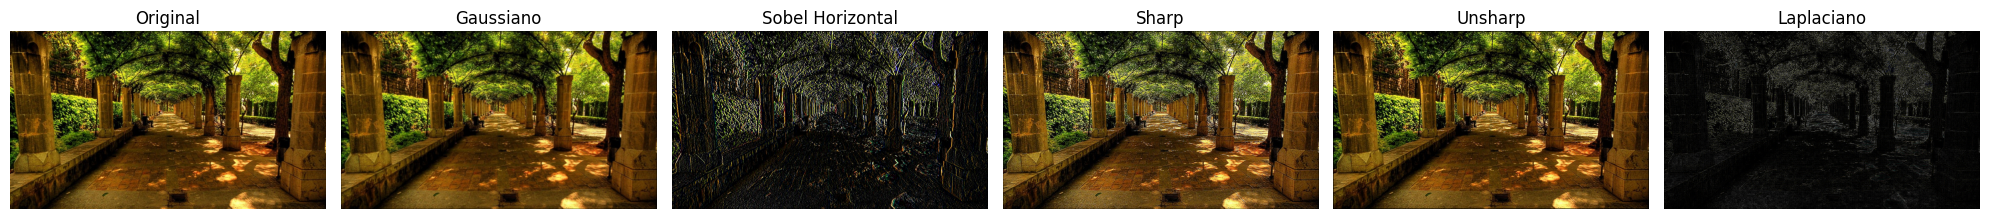

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def aplicar_filtro_convolucion_manual(imagen, kernel):
    # Dimensiones de la imagen y del kernel
    alto_imagen, ancho_imagen = imagen.shape[0], imagen.shape[1]
    alto_kernel, ancho_kernel = kernel.shape[0], kernel.shape[1]
    
    # Crear una imagen de salida vacía
    imagen_filtrada = np.zeros_like(imagen)
    
    # Desplazarse por cada pixel de la imagen
    for y in range(alto_imagen - alto_kernel + 1):
        for x in range(ancho_imagen - ancho_kernel + 1):
            for canal in range(3):  # Para cada canal de color (R, G, B)
                # Extraer la región de la imagen que coincide con el kernel
                region = imagen[y:y+alto_kernel, x:x+ancho_kernel, canal]
                # Calcular el producto punto entre el kernel y la región
                valor = np.sum(kernel * region)
                # Asignar el valor resultante al pixel correspondiente en la imagen filtrada
                imagen_filtrada[y + alto_kernel//2, x + ancho_kernel//2, canal] = np.clip(valor, 0, 255)
    
    return imagen_filtrada


ruta = '../imagenes/im1.jpg'
imagen = plt.imread(ruta)


kernels = {
    "Gaussiano": np.array([[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]]) / 16,
    
    "Sobel Horizontal": np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]]),
    
    "Sharp": np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]]),
    
    "Unsharp": -1 * np.array([[1, 4, 6, 4, 1],
                              [4, 16, 24, 16, 4],
                              [6, 24, -476, 24, 6],
                              [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1]]) / 256,
    
    "Laplaciano": np.array([[0, -1, 0],
                            [-1, 4, -1],
                            [0, -1, 0]])
}

# Mostrar la imagen original y las imágenes filtradas
fig, axs = plt.subplots(1, len(kernels) + 1, figsize=(20, 4))
axs[0].imshow(imagen)
axs[0].set_title("Original")
axs[0].axis('off')

for i, (nombre, kernel) in enumerate(kernels.items(), start=1):
    imagen_filtrada = aplicar_filtro_convolucion_manual(imagen, kernel)
    axs[i].imshow(imagen_filtrada)
    axs[i].set_title(nombre)
    axs[i].axis('off')

plt.tight_layout()
plt.show()
